<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [1]:
!pip install requests
!pip install bs4


  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=a740803531bb827525b529766b9fb98a41c7d7186d24e64632bb4abd45282f2a
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


Download the webpage at the url


In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
data = requests.get(url).text

Create a soup object


In [4]:
soup = BeautifulSoup(data, "html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
soup.find("table").find("tr")

<tr>
<td>No.</td>
<td>Language</td>
<td>Created By</td>
<td>Average Annual Salary</td>
<td>Learning Difficulty</td>
</tr>

In [6]:
import pandas as pd

table = soup.find("table")

data_frame = pd.DataFrame(["Language", "Annual Average Salary"])

for row  in table.find_all("tr"):
    col = row.find_all("td")
    if(len(col)>0):
        lang = col[1].text
        aas = col[3].text
    
        data_frame = data_frame.append({"Language":lang, "Annual Average Salary":aas}, ignore_index = True)

Save the scrapped data into a file named *popular-languages.csv*


In [7]:
data_frame

,0,Annual Average Salary,Language
0,Language,NaN,NaN
1,Annual Average Salary,NaN,NaN
2,NaN,Average Annual Salary,Language
3,NaN,"$114,383",Python
4,NaN,"$101,013",Java
5,NaN,"$92,037",R
6,NaN,"$110,981",Javascript
7,NaN,"$130,801",Swift
8,NaN,"$113,865",C++
9,NaN,"$88,726",C#


In [8]:
data_frame.reset_index(inplace=True)
data_frame.drop("index", axis=1, inplace=True)
data_frame

,0,Annual Average Salary,Language
0,Language,NaN,NaN
1,Annual Average Salary,NaN,NaN
2,NaN,Average Annual Salary,Language
3,NaN,"$114,383",Python
4,NaN,"$101,013",Java
5,NaN,"$92,037",R
6,NaN,"$110,981",Javascript
7,NaN,"$130,801",Swift
8,NaN,"$113,865",C++
9,NaN,"$88,726",C#


In [11]:
data_frame = data_frame.drop(0, axis=1)

In [12]:
data_frame = data_frame.dropna()
data_frame

,Annual Average Salary,Language
2,Average Annual Salary,Language
3,"$114,383",Python
4,"$101,013",Java
5,"$92,037",R
6,"$110,981",Javascript
7,"$130,801",Swift
8,"$113,865",C++
9,"$88,726",C#
10,"$84,727",PHP
11,"$84,793",SQL


In [13]:
data_frame = data_frame.drop(2)
data_frame

,Annual Average Salary,Language
3,"$114,383",Python
4,"$101,013",Java
5,"$92,037",R
6,"$110,981",Javascript
7,"$130,801",Swift
8,"$113,865",C++
9,"$88,726",C#
10,"$84,727",PHP
11,"$84,793",SQL
12,"$94,082",Go


In [24]:
data_frame

,Annual Average Salary,Language
0,114383,Python
1,101013,Java
2,92037,R
3,110981,Javascript
4,130801,Swift
5,113865,C++
6,88726,C#
7,84727,PHP
8,84793,SQL
9,94082,Go


In [21]:
data_frame['Annual Average Salary'] = data_frame['Annual Average Salary'].astype(int)

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Anunual Average Salary based on Programming Language')

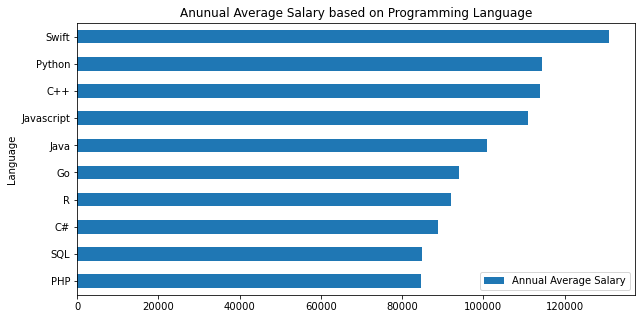

In [38]:
data_frame.sort_values('Annual Average Salary').set_index('Language').plot.barh(figsize=[10,5])
plt.title('Anunual Average Salary based on Programming Language')

/tmp/wsuser/ipykernel_228/830600737.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame["Annual Average Salary"] = data_frame['Annual Average Salary'].str.replace(',|\$',"")


In [43]:
data_frame.to_csv("popular-languages.csv", index=False)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
